In [5]:
import sleap_io as sio
from utils import *

In [13]:
root_path = 'S:/sfn-poster/sleap-nn'

# Get paths to relevant files
slp_paths = get_file_paths(f"{root_path}", 'slp', '', session_type='v', print_paths=True, print_n=np.inf)

Found 4 .slp files
0 S:\sfn-poster\sleap-nn\7001\v1\04042025_7001_v1.predictions.slp
1 S:\sfn-poster\sleap-nn\7001\v10\04162025_7001_v10.predictions.slp
2 S:\sfn-poster\sleap-nn\7004\v2\04052025_7004_v2.predictions.slp
3 S:\sfn-poster\sleap-nn\7004\v10\04152025_7004_v10.predictions.slp


In [53]:
# Make CSV builder function
# get skeleton names, use as headers, populate with points 
print(f"{slp.skeleton}\n")
print(f"{slp.labeled_frames[0].instances[0].points}\n")
print(f"{slp.labeled_frames[0].instances[0].points[1][0][0]}\n")

Skeleton(nodes=["nose", "centroid", "tailbase"], edges=[(0, 1), (1, 2)])

[([         nan,          nan], 0.        , False, False, 'nose')
 ([728.30859375, 339.58654785], 1.05346024,  True, False, 'centroid')
 ([         nan,          nan], 0.        , False, False, 'tailbase')]

728.30859375



In [97]:
for slp_path in slp_paths:
    slp = sio.load_file(f"{slp_path}")

    mouse_id = slp_path.parts[-3]
    session_id = slp_path.parts[-2]

    # Extract node names for df column names
    sleap_cols = []
    for node in slp.skeleton.nodes:
        sleap_cols.append(f"{node.name}_x")
        sleap_cols.append(f"{node.name}_y")
    print(*sleap_cols)

    # Initialize df
    sleap_coords = pd.DataFrame(np.nan, index=range(len(slp.labeled_frames)), columns=sleap_cols)

    # Populate df
    data = {col: [] for col in sleap_cols}

    for frame in slp.labeled_frames:
        for kk, node in enumerate(slp.skeleton.nodes):
            data[f'{node.name}_x'].append(frame.instances[0].points[kk][0][0])
            data[f'{node.name}_y'].append(frame.instances[0].points[kk][0][1])

    sleap_coords_pd = pd.DataFrame(data)

    # Interpolar missing values
    sleap_coords_pd = sleap_coords_pd.interpolate().ffill().bfill()


    # Save csv
    sleap_coords_pd.to_csv(f"sleap_csv/{mouse_id}_{session_id}_slp.csv")

nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y
nose_x nose_y centroid_x centroid_y tailbase_x tailbase_y


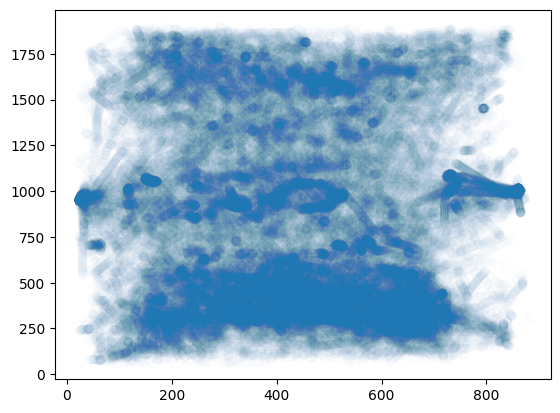

In [109]:
test = pd.read_csv('sleap_csv/7004_v10_slp.csv')
plt.scatter(test['nose_x'], test['nose_y'], alpha=.01)